In [15]:
import pandas as pd
from fbprophet import Prophet

In [38]:
df = pd.read_csv("BHARTIARTL.NS.csv")

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,559.000000,561.650024,550.150024,559.049988,557.049622,39287024.0
1,2020-06-02,563.000000,572.299988,556.099976,558.099976,556.103027,31972728.0
2,2020-06-03,568.000000,568.299988,549.250000,551.650024,549.676147,29234914.0
3,2020-06-04,552.299988,585.400024,549.549988,572.450012,570.401733,29454264.0
4,2020-06-05,584.000000,590.000000,567.450012,584.349976,582.259094,47873027.0


In [40]:
df_n = df[['Date', 'Close']]

In [41]:
df_n.columns = ['ds', 'y']

In [42]:
df_n

,ds,y
0,2020-06-01,559.049988
1,2020-06-02,558.099976
2,2020-06-03,551.650024
3,2020-06-04,572.450012
4,2020-06-05,584.349976
...,...,...
245,2021-05-24,526.799988
246,2021-05-25,526.099976
247,2021-05-26,525.750000
248,2021-05-27,519.799988


In [43]:
prophet = Prophet()

In [44]:
prophet.fit(df_n)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = prophet.make_future_dataframe(periods=365)

In [46]:
future

,ds
0,2020-06-01
1,2020-06-02
2,2020-06-03
3,2020-06-04
4,2020-06-05
...,...
610,2022-05-24
611,2022-05-25
612,2022-05-26
613,2022-05-27


In [47]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
610,2022-05-24,519.363413,1192.671644,-227.597035
611,2022-05-25,519.488776,1187.286036,-236.334793
612,2022-05-26,517.499252,1200.071379,-239.300842
613,2022-05-27,519.368633,1194.409703,-249.207271
614,2022-05-28,510.335712,1198.985388,-246.531819


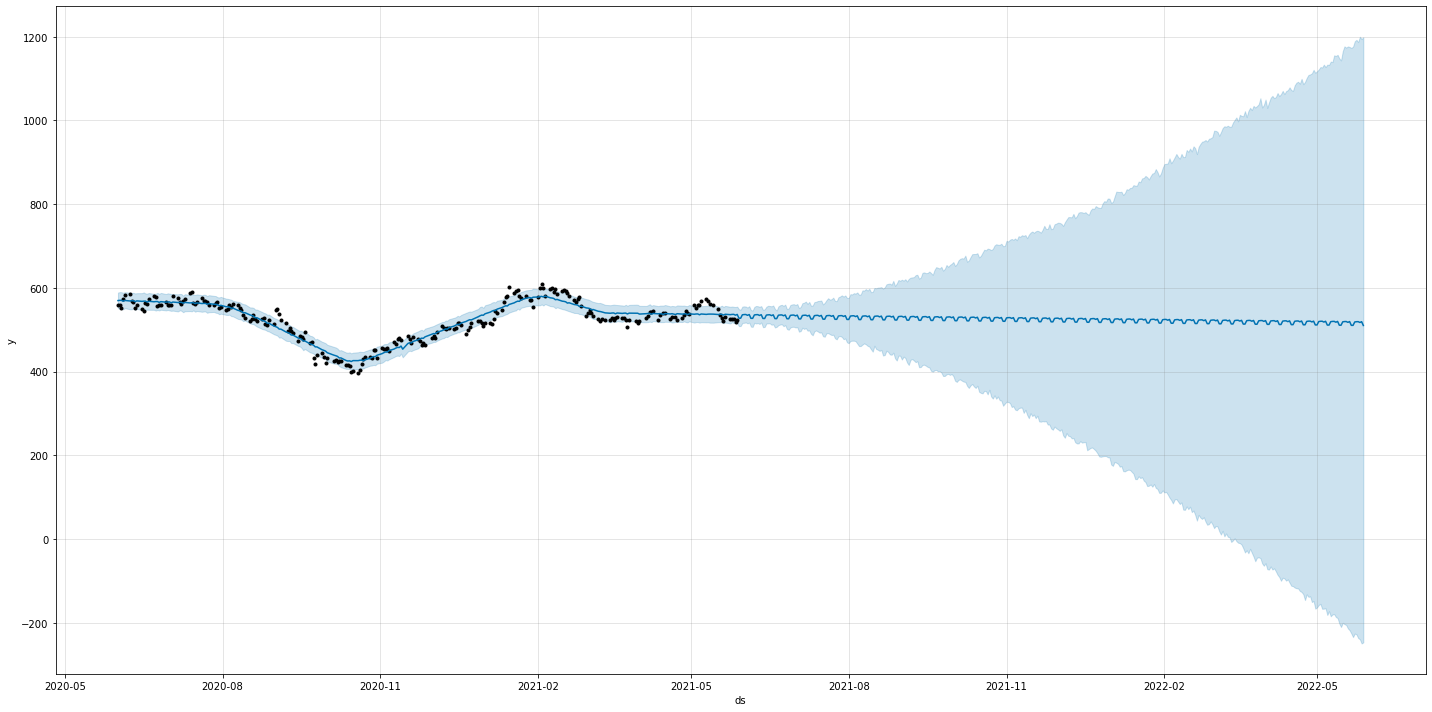

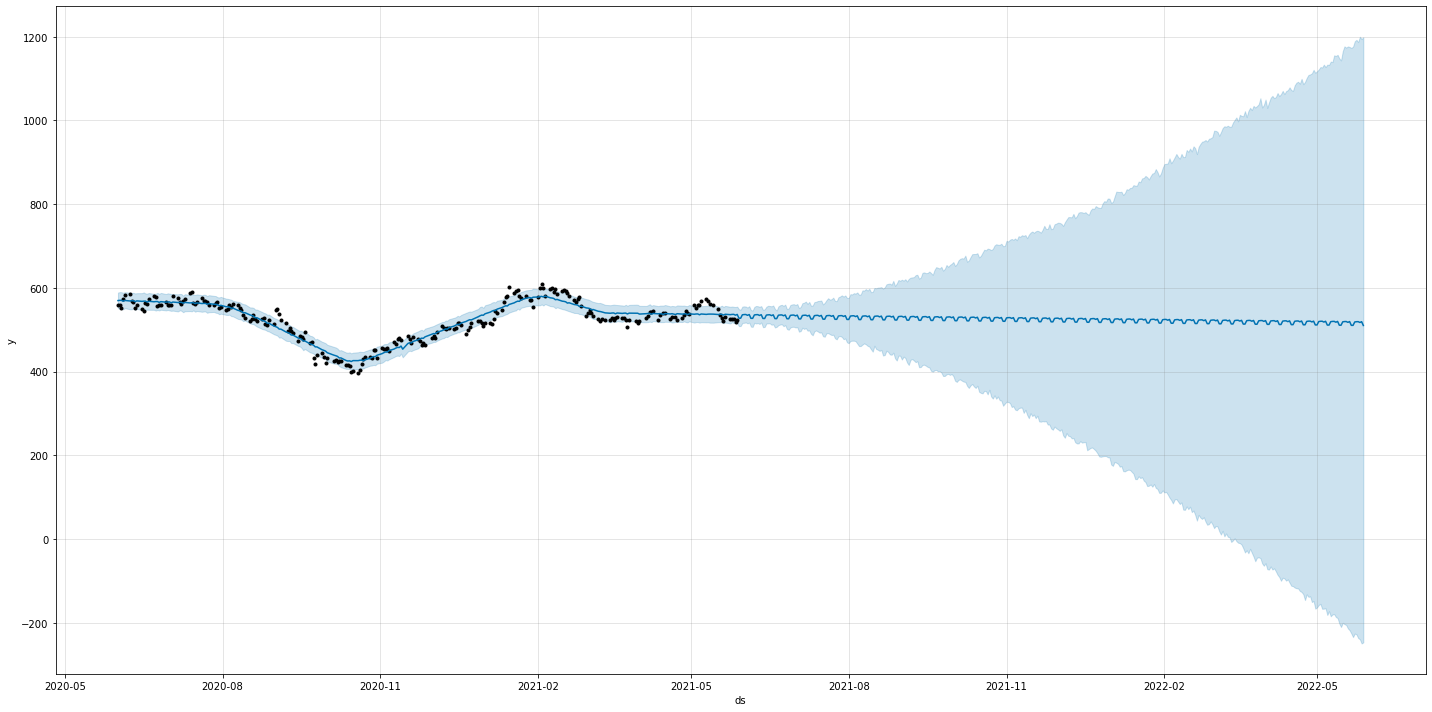

In [48]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))